In [10]:
import json
import os
import numpy as np
import itertools

from transformers import PreTrainedTokenizerFast, AutoTokenizer, AutoConfig
from transformers import XLMRobertaTokenizerFast
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
from notebook_utils import *

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


# Load the in-lang language modeling results (MRR)

In [12]:
result_dir = "/home/limisiewicz/my-luster/entangled-in-scripts/models"

languages = ('ar', 'tr', 'zh','el', 'es', 'en')
#languages = ('ar', 'tr','el', 'es', 'en')
alphas = (0.25, 0.5, 0.75, 1.0)

In [13]:
mrr_results = {}
metric='mrr'

for lang in languages:
    mrr_results[lang] = []
    for alpha in alphas:

        result_file = f"{result_dir}/LM/multilingual-tokenization/alpha-{alpha}_alpha-train-0.25_N-120000_1234/{lang}/{metric}_eval_all.txt"
            
        with open(result_file, 'r') as in_file:
            res = json.load(in_file)[f'eval_{metric}']
                
        mrr_results[lang].append(res)

## Plot in-lang results

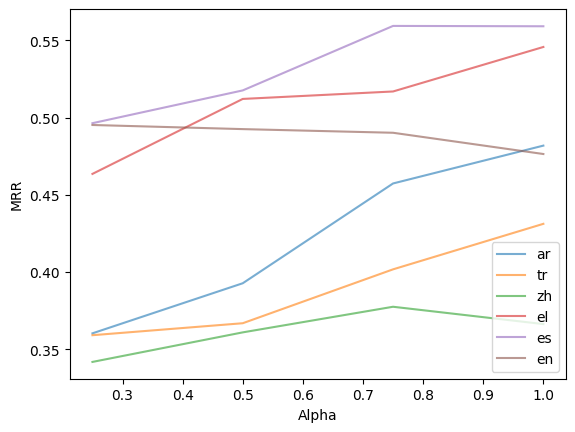

In [14]:
plt.figure()

for lang in languages:
    plt.plot(alphas, mrr_results[lang], label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("MRR")
plt.legend()